#### Model Deployment

This section demonstrates how linear regression algorithms is exported. However using CSV as input

The exported model can be utilised within python implementations such as API's

##### Step 1

Load the required dependencies including pickle the native Python library for serialising data objects:

[!Caution] The pickle module is not secure. Only unpickle data you trust.

In [8]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
plt.style.use('../style_Matplotlib_charts.mplstyle')
import pickle

import os
#Create a folder for the output files
if not os.path.exists("output"):
    os.makedirs("output")

##### Step 2

- Open and parse the CSV file and store data as variable array objects for visualisation and exportation.

- The CSV files are an alternative way to give inputs to the model

In [19]:
training_data = pd.read_csv('A_model_ready_data_new_1.csv', delimiter=',')
x = np.array(training_data.iloc[:,1]).reshape(-1, 1)
y = np.array(training_data.iloc[:,0])

Here I have used the original dataset, but you can use other CSV datasets to input into the data

You can use python to query the data set pertaining to the amount of training examples there and samples of the data

In [20]:
m = len(x)
print(f"Number of training examples is: {m}")
table = pd.DataFrame({
    training_data.columns[0]: x.flatten(),  # Flatten x for easy display
    training_data.columns[1]: y
})
print(table.head())

Number of training examples is: 9336
       Target  date_sold
0  2016-01-13     525000
1  2016-01-13     480000
2  2016-01-13     452000
3  2016-01-15     550000
4  2016-01-15     535000


You can plot features x and y data on a graph using column headings as graph labels

TypeError: unhashable type: 'numpy.ndarray'

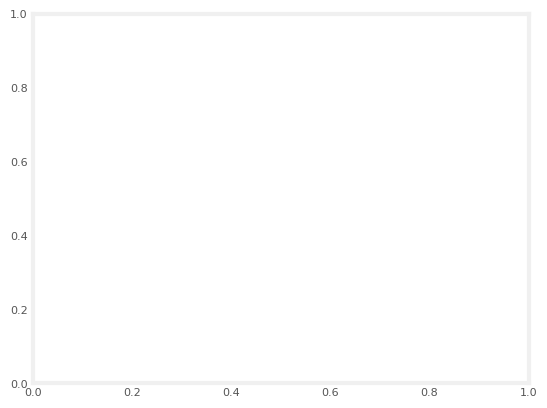

In [22]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("House Price Specifications Data")
# Set the y-axis label
plt.ylabel(f'Training {training_data.columns[0]}')
# Set the x-axis label
plt.xlabel(f'Training {training_data.columns[1]}')
plt.show()

#### Step 3

Use the sklearn library to fit the model to the training data which will provide a line of best fit with the lowest cost based on a sklearn algorithm.

In [23]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

ValueError: could not convert string to float: '2016-01-13'

##### Step 4


- Import the multivariable model as it has the highest accuracy and lowest cost to be used for python endpoint

- The following is the an example of a python implementation that can be used in an API

In [ ]:
loaded_model = pickle.load(open('output/A_MV_model_v6.sav', 'rb'))
# The order is 'ds_float','num_parking', 'num_bed', 'num_bath', 'property_size', 'suburb_lat', 'suburb_lng', 'prop_cbd', 'tot_rooms', 'suburb_median_income' and must be prescaled
predict = np.array([[1640995200, 1, 4, 4, 0.1, -33.88447, 151.21001, 0.2, 8, 60320]])
result = loaded_model.predict(predict)
print(result[0])

2358583.6900360286


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


- The following is amn example of utilising the model for predictions and visualiasing the prediction as a graph.png file (Can be used in Python Flask UI API Endpoint)

In [ ]:
predict = np.array([[4]])
y_prediction = my_model.predict(predict)

y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.scatter(predict, y_prediction, marker='D', c='r', zorder=10, s=100)
plt.text(y_prediction, predict, f"Target {y_prediction[0]} is prediction from {predict[0,0]} input")
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {training_data.columns[0]}')
plt.xlabel(f'Training {training_data.columns[1]}')
plt.savefig('output/graph.png')   # save the figure to file
plt.close()    # close the figure window

ValueError: could not convert string to float: '2016-01-13'

The following is an example of how you would import and have a model making predictions based off user input

In [51]:
import pickle
import numpy as np
# Load the model from disk
loaded_model = pickle.load(open('output/A_MV_model_v6.sav', 'rb'))
predict = np.array([[1640995200, 1, 4, 4, 0.1, -33.88447, 151.21001, 0.2, 8, 60320]]).reshape(1, -1)
result = loaded_model.predict(predict)
print(result[0])

2358583.6900360286


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
